# 每个股票做为一条数据学习

每个股票做为一条学习数据，以股票前N天的数据为训练数据，以最后一天的涨跌幅度为标签，学习前N天的数据和明天的涨跌幅之间的关系

##环境设置和变量设置

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import  keras
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
root_path = Path('/gdrive/My Drive/data/tuShare')
%cd {root_path}
%ls

/gdrive/My Drive/data/tuShare
daily/            ReadMe.gdoc        trade_cal.csv
DiYiGe_model.png  stock_basic.csv    ts_all_code.csv
namechange.csv    stock_company.csv  ts_code_rows.csv


###  先看看所有股票数据的信息

所有股票的信息归总在ts_code_rows.csv

In [7]:
code_rows = pd.read_csv(root_path/'ts_code_rows.csv')
code_rows.shape

(3754, 2)

In [7]:
code_rows.head()

,ts_code,rows
0,600689.SH,4000
1,600690.SH,4000
2,600691.SH,4000
3,600692.SH,4000
4,600693.SH,4000


In [8]:
code_rows.describe()

,rows
count,3754.000000
mean,2275.051945
std,1399.546126
min,0.000000
25%,855.500000
50%,2150.000000
75%,4000.000000
max,4000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3613507198>]],
      dtype=object)

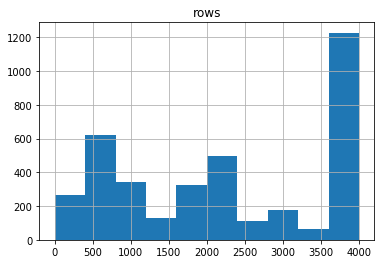

In [9]:
code_rows.hist()

数据75%以上都有855条记录，也就是说有855个交易日，这样可以用这些数据，每个股票最近855个交易记录作为一条数据来学习

In [8]:
record = 855 #交易记录条数
file_paths = ['daily/{}.csv'.format(code_row) for code_row in code_rows[code_rows['rows']>record]['ts_code']]
file_paths

['daily/600689.SH.csv',
 'daily/600690.SH.csv',
 'daily/600691.SH.csv',
 'daily/600692.SH.csv',
 'daily/600693.SH.csv',
 'daily/600694.SH.csv',
 'daily/600695.SH.csv',
 'daily/600696.SH.csv',
 'daily/600697.SH.csv',
 'daily/600698.SH.csv',
 'daily/600699.SH.csv',
 'daily/600701.SH.csv',
 'daily/600702.SH.csv',
 'daily/600703.SH.csv',
 'daily/600704.SH.csv',
 'daily/600705.SH.csv',
 'daily/600706.SH.csv',
 'daily/600707.SH.csv',
 'daily/600708.SH.csv',
 'daily/600710.SH.csv',
 'daily/600711.SH.csv',
 'daily/600712.SH.csv',
 'daily/600713.SH.csv',
 'daily/600714.SH.csv',
 'daily/600715.SH.csv',
 'daily/600716.SH.csv',
 'daily/600717.SH.csv',
 'daily/600718.SH.csv',
 'daily/600719.SH.csv',
 'daily/600720.SH.csv',
 'daily/600721.SH.csv',
 'daily/600722.SH.csv',
 'daily/600723.SH.csv',
 'daily/600724.SH.csv',
 'daily/600725.SH.csv',
 'daily/600726.SH.csv',
 'daily/600727.SH.csv',
 'daily/600728.SH.csv',
 'daily/600729.SH.csv',
 'daily/600730.SH.csv',
 'daily/600731.SH.csv',
 'daily/600732.S

In [9]:
 len(file_paths)

2815

##探索个股数据

In [10]:
one_stock = pd.read_csv(root_path/file_paths[0])
one_stock.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.010778e+07,9.182305,9.415730,8.992935,9.211012,9.211282,-0.000270,0.054271,45689.984835,52353.909473
std,5.074949e+04,4.007492,4.131253,3.919118,4.027552,4.027628,0.350366,3.370522,56673.322571,86296.416470
min,2.002073e+07,2.290000,2.400000,2.290000,2.340000,2.340000,-2.320000,-22.820000,675.820000,319.715000
25%,2.006121e+07,6.647500,6.810000,6.500000,6.677500,6.677500,-0.130000,-1.680000,10048.067500,6349.683750
50%,2.011021e+07,8.700000,8.910000,8.545000,8.720000,8.720000,0.010000,0.120000,26018.965000,22514.548500
75%,2.015112e+07,11.022500,11.310000,10.790000,11.090000,11.090000,0.140000,1.672500,58596.640000,59707.239250
max,2.019123e+07,25.910000,26.680000,24.600000,25.930000,25.930000,2.260000,10.140000,528263.510000,948384.733000


In [8]:
one_stock.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600689.SH,20191231,9.64,9.97,9.63,9.80,9.66,0.14,1.4493,38844.72,38199.835
1,600689.SH,20191230,9.52,9.68,9.41,9.66,9.57,0.09,0.9404,17645.70,16899.207
2,600689.SH,20191227,9.68,9.68,9.56,9.57,9.61,-0.04,-0.4162,12860.69,12367.035
3,600689.SH,20191226,9.56,9.65,9.55,9.61,9.54,0.07,0.7338,10453.60,10036.308
4,600689.SH,20191225,9.52,9.63,9.48,9.54,9.52,0.02,0.2101,12995.01,12426.958


In [13]:
one_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
ts_code       4000 non-null object
trade_date    4000 non-null int64
open          4000 non-null float64
high          4000 non-null float64
low           4000 non-null float64
close         4000 non-null float64
pre_close     4000 non-null float64
change        4000 non-null float64
pct_chg       4000 non-null float64
vol           4000 non-null float64
amount        4000 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 343.9+ KB


In [13]:
#将日期转为星期，我认为星期几对股票交易有影响
one_stock['trade_date'] = pd.to_datetime(one_stock['trade_date'],format='%Y%m%d').dt.dayofweek
one_stock.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600689.SH,1,9.64,9.97,9.63,9.80,9.66,0.14,1.4493,38844.72,38199.835
1,600689.SH,0,9.52,9.68,9.41,9.66,9.57,0.09,0.9404,17645.70,16899.207
2,600689.SH,4,9.68,9.68,9.56,9.57,9.61,-0.04,-0.4162,12860.69,12367.035
3,600689.SH,3,9.56,9.65,9.55,9.61,9.54,0.07,0.7338,10453.60,10036.308
4,600689.SH,2,9.52,9.63,9.48,9.54,9.52,0.02,0.2101,12995.01,12426.958


In [14]:
np.around(one_stock['pct_chg'])

0       1.0
1       1.0
2      -0.0
3       1.0
4       0.0
       ... 
3995    0.0
3996   -0.0
3997   -1.0
3998    0.0
3999   -1.0
Name: pct_chg, Length: 4000, dtype: float64

In [48]:
one_stock[['pct_chg','close']][1:5]

,pct_chg,close
1,0.9404,9.66
2,-0.4162,9.57
3,0.7338,9.61
4,0.2101,9.54


In [50]:
one_stock[['pct_chg']][1:5].values

array([[ 0.9404],
       [-0.4162],
       [ 0.7338],
       [ 0.2101]])

## 数据流水线



### 创建数据生成器
将数据目录传给生成器，返回处理好的数据信息

In [11]:
import random
#对数据集进行随机打乱
random.shuffle(file_paths)
test_split = int(len(file_paths) * 0.2)#20：80 测试集：训练集
train_file_paths = file_paths[test_split:]
test_file_paths = file_paths[:test_split]
val_split = int(len(train_file_paths)* 0.2) #20:80 验证集：训练集
val_file_paths = train_file_paths[:val_split]
train_file_paths = train_file_paths[val_split:]

print('训练集： {}条'.format( len(train_file_paths)))
print('验证集： {}条'.format( len(val_file_paths)))
print('测试集： {}条'.format( len(test_file_paths)))

训练集： 1802条
验证集： 450条
测试集： 563条


#####将分类热独编码 one-hot

In [25]:

pct_chg_category = dict(zip(np.arange(-10.0,11.0),np.arange(21)))#涨跌幅分为21类
pct_chg_category 

{-10.0: 0,
 -9.0: 1,
 -8.0: 2,
 -7.0: 3,
 -6.0: 4,
 -5.0: 5,
 -4.0: 6,
 -3.0: 7,
 -2.0: 8,
 -1.0: 9,
 0.0: 10,
 1.0: 11,
 2.0: 12,
 3.0: 13,
 4.0: 14,
 5.0: 15,
 6.0: 16,
 7.0: 17,
 8.0: 18,
 9.0: 19,
 10.0: 20}

In [0]:

def gen_data(file_path):
  #数据生成函数
  
  data = pd.read_csv(root_path/file_path)
  #将日期转为星期，我认为星期几对股票交易有影响
  #data['trade_date'] = pd.to_datetime(data['trade_date'],format='%Y%m%d').dt.dayofweek
  data.pop('trade_date')
  data.pop('ts_code') #去除股票代码
  #data.pop('vol')
  #data.pop('amount')
  data['vol'] = data['vol']/10000  #这两个值太大了，缩小10000倍
  data['amount'] = data['amount']/10000  #这两个值太大了，缩小10000倍
  target = data.pop('pct_chg')
  #target = data['pct_chg']

  #数据处理
  data = data[1:51] #前50天的数据做为参数
  #target = target[:5][]
  pct_chg = pct_chg_category[round(target.values[0])] #返回的是涨跌幅分类

  pct_chg_one_hot = tf.one_hot(pct_chg,len(pct_chg_category))

  #return data.values,target.values[0]
  return data.values,pct_chg_one_hot


def gen_train_data():
  for file_path in train_file_paths:
    #file_path = random.choice(train_file_paths)
    yield gen_data(file_path)

def gen_val_data():
  for file_path in val_file_paths:
    #file_path = random.choice(val_file_paths)
    yield gen_data(file_path)

def gen_test_data():
  for file_path in test_file_paths:
    yield gen_data(file_path)

In [245]:
ds_k ,ds_v = next(iter(gen_train_data()))
ds_k

array([[ 3.47800000e+01,  3.66300000e+01,  3.47800000e+01,
         3.60900000e+01,  3.47700000e+01,  1.32000000e+00,
         1.15717710e+01,  4.17275969e+01],
       [ 3.40000000e+01,  3.50700000e+01,  3.39900000e+01,
         3.47700000e+01,  3.40000000e+01,  7.70000000e-01,
         7.49925200e+00,  2.60247469e+01],
       [ 3.38400000e+01,  3.45000000e+01,  3.38000000e+01,
         3.40000000e+01,  3.39600000e+01,  4.00000000e-02,
         4.29027200e+00,  1.46355952e+01],
       [ 3.40700000e+01,  3.43100000e+01,  3.37000000e+01,
         3.39600000e+01,  3.40700000e+01, -1.10000000e-01,
         3.98585200e+00,  1.35348755e+01],
       [ 3.35500000e+01,  3.45400000e+01,  3.35100000e+01,
         3.40700000e+01,  3.37600000e+01,  3.10000000e-01,
         6.78189900e+00,  2.31268142e+01],
       [ 3.30500000e+01,  3.40500000e+01,  3.24500000e+01,
         3.37600000e+01,  3.31800000e+01,  5.80000000e-01,
         9.41934800e+00,  3.17462863e+01],
       [ 3.30000000e+01,  3.345000

In [246]:
ds_v

<tf.Tensor: shape=(21,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)>

###生成流水线

In [247]:
ds_train = tf.data.Dataset.from_generator(
    gen_train_data,
    args=[],
    #output_types=(tf.float32,tf.int32),
    output_types=(tf.float32,tf.float32),
    output_shapes=((50,8), (21,))
    #output_shapes=((50,8), ())
    )
ds_val = tf.data.Dataset.from_generator(
    gen_val_data,
    args=[],
    #output_types=(tf.float32,tf.int32),
    output_types=(tf.float32,tf.float32),
    output_shapes=((50,8), (21,))
    #output_shapes=((50,8), ())
    )
ds_test = tf.data.Dataset.from_generator(
    gen_test_data,
    args=[],
    #output_types=(tf.float32,tf.int32),
    output_types=(tf.float32,tf.float32),
    output_shapes=((50,8), (21,))
    #output_shapes=((50,8), ())
    )

ds_train

<FlatMapDataset shapes: ((50, 8), (21,)), types: (tf.float32, tf.float32)>

In [248]:
for ids, sequence_batch in ds_train.take(1):
  print(ids)
  print(ids.numpy()[0])
  print()
  print(sequence_batch)

tf.Tensor(
[[ 3.4779999e+01  3.6630001e+01  3.4779999e+01  3.6090000e+01
   3.4770000e+01  1.3200001e+00  1.1571771e+01  4.1727596e+01]
 [ 3.4000000e+01  3.5070000e+01  3.3990002e+01  3.4770000e+01
   3.4000000e+01  7.6999998e-01  7.4992518e+00  2.6024748e+01]
 [ 3.3840000e+01  3.4500000e+01  3.3799999e+01  3.4000000e+01
   3.3959999e+01  3.9999999e-02  4.2902722e+00  1.4635595e+01]
 [ 3.4070000e+01  3.4310001e+01  3.3700001e+01  3.3959999e+01
   3.4070000e+01 -1.1000000e-01  3.9858520e+00  1.3534876e+01]
 [ 3.3549999e+01  3.4540001e+01  3.3509998e+01  3.4070000e+01
   3.3759998e+01  3.1000000e-01  6.7818990e+00  2.3126814e+01]
 [ 3.3049999e+01  3.4049999e+01  3.2450001e+01  3.3759998e+01
   3.3180000e+01  5.7999998e-01  9.4193478e+00  3.1746286e+01]
 [ 3.3000000e+01  3.3450001e+01  3.2849998e+01  3.3180000e+01
   3.3279999e+01 -1.0000000e-01  5.7553730e+00  1.9033226e+01]
 [ 3.3090000e+01  3.3480000e+01  3.2750000e+01  3.3279999e+01
   3.3200001e+01  7.9999998e-02  5.5388198e+00  1.83

In [0]:
train_dataset = ds_train.batch(5)
val_dataset = ds_val.batch(5)
test_dataset = ds_test.batch(5)

##创建模型

In [0]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(50, 8)),
    
    #keras.layers.Dense(6,input_shape=(50,8)),
    #keras.layers.Dense(4,activation='relu'),
    #keras.layers.Dropout(0.3),
    #keras.layers.Dense(2,activation='relu'),
    
    keras.layers.Flatten(input_shape=(50,8)),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(20,activation='relu'),
    #keras.layers.Dropout(0.3),
    #keras.layers.Dense(10,activation='relu'),
    #keras.layers.Dropout(0.3),
    #keras.layers.Dense(5,activation='relu'),
    #keras.layers.Dense(1),
    keras.layers.Dense(21),
])


查看模型信息

In [251]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 300)               120300    
_________________________________________________________________
dropout_69 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 200)               60200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 100)               20100     
_________________________________________________________________
dropout_71 (Dropout)         (None, 100)             

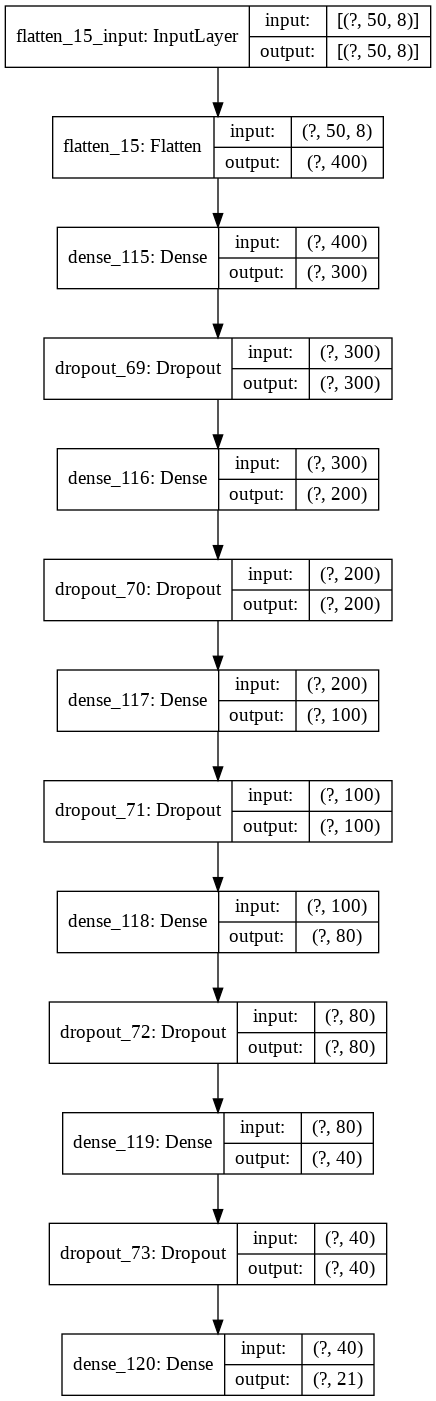

In [252]:
keras.utils.plot_model(model,'DiYiGe_model.png',show_shapes=True)

###编译模型

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [255]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    )

Epoch 1/10
361/361 [==============================] - 24s 66ms/step - loss: 5.2458 - accuracy: 0.3119 - val_loss: 1.9413 - val_accuracy: 0.3222
Epoch 2/10
361/361 [==============================] - 24s 65ms/step - loss: 1.9519 - accuracy: 0.3457 - val_loss: 1.9042 - val_accuracy: 0.3222
Epoch 3/10
361/361 [==============================] - 22s 62ms/step - loss: 1.9281 - accuracy: 0.3468 - val_loss: 1.9167 - val_accuracy: 0.3222
Epoch 4/10
361/361 [==============================] - 22s 62ms/step - loss: 1.9902 - accuracy: 0.3468 - val_loss: 1.9025 - val_accuracy: 0.3222
Epoch 5/10
361/361 [==============================] - 23s 63ms/step - loss: 1.9129 - accuracy: 0.3468 - val_loss: 1.9021 - val_accuracy: 0.3222
Epoch 6/10
361/361 [==============================] - 22s 62ms/step - loss: 1.9130 - accuracy: 0.3468 - val_loss: 1.9054 - val_accuracy: 0.3222
Epoch 7/10
361/361 [==============================] - 22s 62ms/step - loss: 1.9092 - accuracy: 0.3474 - val_loss: 1.9028 - val_accuracy:

In [256]:
history.history

{'accuracy': [0.3118757,
  0.34572697,
  0.34683684,
  0.34683684,
  0.34683684,
  0.34683684,
  0.34739178,
  0.34683684,
  0.34406215,
  0.34683684],
 'loss': [5.251860501432789,
  1.95256352517237,
  1.9287860430901111,
  1.991094218837831,
  1.9136278024656526,
  1.9138277175026914,
  1.9099445395940682,
  1.9129228861165233,
  1.910532268316182,
  1.908941380985569],
 'val_accuracy': [0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223,
  0.32222223],
 'val_loss': [1.9412811292542351,
  1.9042493489053514,
  1.9167367855707804,
  1.902521722846561,
  1.902078272236718,
  1.9054049491882323,
  1.902813364399804,
  1.9031271590126886,
  1.9058507906066047,
  1.9018780165248448]}

好像没学到什么，没怎么变化

###评估模型

In [257]:
test_loss, test_acc =  model.evaluate_generator(test_dataset,steps=2)
print('成功率：',test_acc)
print('损失：', test_loss)

成功率： 0.7
损失： 1.4913623332977295


In [0]:
test_datas,test_labels = [],[]
for file_name in test_file_paths[:5]:
  test_data,test_label = gen_data(file_name)
  test_datas.append(test_data)
  test_labels.append(np.argmax(test_label.numpy()))

In [48]:
len(test_datas)

5

In [51]:
test_labels

[11, 10, 10, 20, 10]

In [0]:
#做出预测
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [260]:
for a,b  in test_dataset.take(5):
  pre_b  = model.predict(a)
  #print('原始：',b.numpy())
  #print('预测：',pre_b)
  print('原始：',np.argmax(b.numpy(),axis=-1))
  print('预测：',np.argmax(pre_b,axis=-1))
  print()

原始： [11 10 10 20 10]
预测： [10 10 10 10 10]

原始： [10 10 11 10 10]
预测： [10 10 10 10 10]

原始： [11 12 12 11 11]
预测： [10 10 10 10 10]

原始： [ 9 10 10  9 11]
预测： [10 10 10 10 10]

原始： [13 10 12 12 11]
预测： [10 10 10 10 10]



看来这里是有问题的，无法进行预测

In [59]:
for a,b  in test_dataset.take(1):
  print('A:',a)
  print('B:',b)

A: tf.Tensor(
[[[ 3.1900001e+00  3.2000000e+00  3.1300001e+00 ... -9.9999998e-03
    6.6687169e+00  2.1133304e+00]
  [ 3.2100000e+00  3.2200000e+00  3.1700001e+00 ... -9.9999998e-03
    6.8625102e+00  2.1946688e+00]
  [ 3.1700001e+00  3.2100000e+00  3.1700001e+00 ...  3.9999999e-02
    6.1798859e+00  1.9709818e+00]
  ...
  [ 3.1300001e+00  3.1500001e+00  3.1199999e+00 ... -9.9999998e-03
    5.7158542e+00  1.7913301e+00]
  [ 3.1600001e+00  3.1700001e+00  3.1199999e+00 ... -2.0000000e-02
    8.6786566e+00  2.7302170e+00]
  [ 3.1500001e+00  3.1600001e+00  3.1199999e+00 ...  2.0000000e-02
    8.9714260e+00  2.8188558e+00]]

 [[ 7.2800002e+00  7.4600000e+00  7.2800002e+00 ...  1.0000000e-01
    5.6233778e+00  4.1625013e+00]
  [ 7.4899998e+00  7.5500002e+00  7.3099999e+00 ... -1.6000000e-01
    6.2193151e+00  4.6050634e+00]
  [ 7.5200000e+00  7.5200000e+00  7.3000002e+00 ... -5.0000001e-02
    7.3088760e+00  5.4273424e+00]
  ...
  [ 6.0700002e+00  6.4299998e+00  6.0700002e+00 ...  3.0000001e